#   Verification of non-parametric hypotheses 

In [1]:
import warnings
warnings.filterwarnings("ignore")

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:
    !wget -q -O requirements.txt https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/seminars/sem3/requirements.txt
    !pip install -q -r requirements.txt


##   Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import scipy.stats as st
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.stats.descriptivestats import sign_test

import seaborn as sns
from permutation_test import permutationtest

#  Permute criterion 
from permute.core import one_sample, two_sample

#  Sign criteria 
from statsmodels.stats.descriptivestats import sign_test

#  for conversions 
import itertools

#  Bootstrap 
from arch.bootstrap import IIDBootstrap


##   Mouses with mirrors 

###  # Data 

In [6]:
data_pd = pd.read_csv('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/seminars/sem3/data/mirror_mice.txt', sep='\t', header=None)
data = data_pd.values.reshape(-1)

data_pd.head()


,0
0,0.348471
1,0.640620
2,0.549818
3,0.537454
4,0.400444


###  # The distribution hytogram 

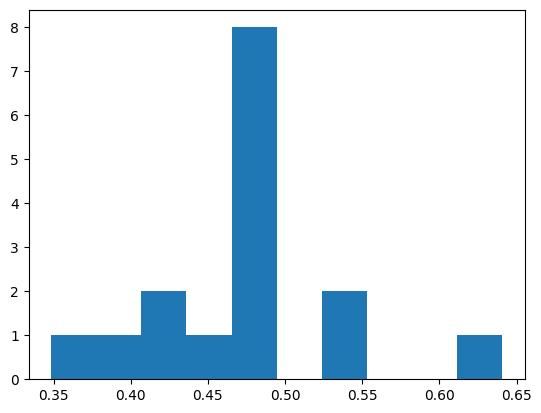

In [7]:
plt.hist(data)
plt.show()


###  # Binomial test: ```st.binom_test'' 

In [8]:
st.binom_test(np.sum(data>0.5), data.shape[0])


0.021270751953125

###  # Sign criterion 

In [9]:
sign_test(data, mu0=0.5)


(-5.0, 0.021270751953125)

  #### The perumtation criterion: 
$H_0: \mathsf{E}X = m_0$

$H_1: \mathsf{E}X <\not=> m_0$

$T = \sum X_i-m_0$

In [10]:
t = (data - 0.5)
T = np.sum(t)
T


-0.39537769999999994

In [11]:
list(itertools.combinations(range(16), 2))


[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (5, 15),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (6, 15),
 (7, 8),
 (7, 9),
 (7, 10),
 (7, 11),
 (7, 12),
 (7, 13),
 (7, 14),
 (7, 15),
 (8, 9),
 (8, 10),
 (8, 11),
 (8, 12),
 (8, 13),
 (8, 14),
 (8, 15),
 (9, 10),
 (9, 11),
 (9, 12),
 (9, 13),
 (9, 14),
 (9, 

In [12]:
list(itertools.product([-1, 1], repeat=2))


[(-1, -1), (-1, 1), (1, -1), (1, 1)]

In [13]:
count = 0
good = 0
for v in itertools.product([-1, 1], repeat=16):
    count +=1
    stat = np.dot(t, v)
    if abs(stat)>=abs(T):
        good+=1
    
        
good/count


0.15777587890625

###  ## Library 

In [14]:
one_sample(data-0.5, alternative='two-sided')


(0.15597844021559784, -0.024711106249999996)

In [15]:
one_sample(data, 0.5*np.ones_like(data), alternative='two-sided')


(0.16085839141608585, -0.024711106249999996)

###  # Bootstrap 

###  # Handmade 

In [16]:
rs = np.random.RandomState(0)

idx = rs.randint(low=0, high=16, size=(1000, 16))
results = []
for i in idx:
    sample = data[i]
    results.append(sample.mean())

np.percentile(results, [2.5, 97.5])


array([0.44498474, 0.50910533])

###  # Library 

In [17]:
bs = IIDBootstrap(data)
bs.conf_int(np.median, 1000, method='basic')


array([[0.465902 ],
       [0.5077678]])

# Anorexia therapy 
**Everitt N., McMahon M. (2004). Nutrition and the surgical patient. In Consensus in Clinical Nutrition, Cambridge: Cambridge University Press. **

  The study assesses the effectiveness of behavioural therapy for anorexia.    For 50 patients, the weight is known before and after the treatment.    Was the therapy effective? 

###  # Data 

In [18]:
data = pd.read_csv('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/seminars/sem3/data/weight.txt', sep='\t')
w = data.values

data.head()


,Before,After
0,80.5,82.2
1,84.9,85.6
2,81.5,81.4
3,82.6,81.9
4,79.9,76.4


###   Data Visualization 

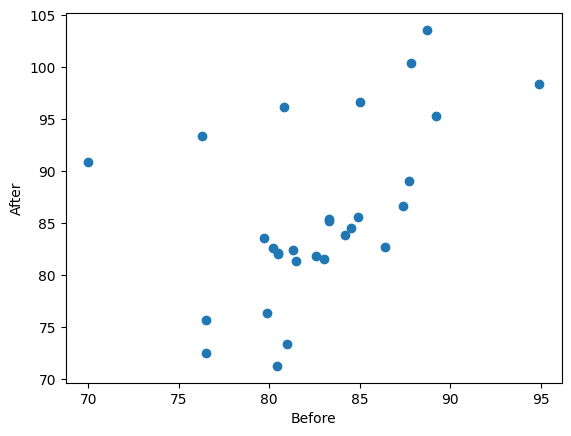

In [19]:
plt.scatter(w[:,0], w[:,1])
plt.xlabel('Before')
plt.ylabel('After')

plt.show()


###   Normality test 

#### QQ-plot

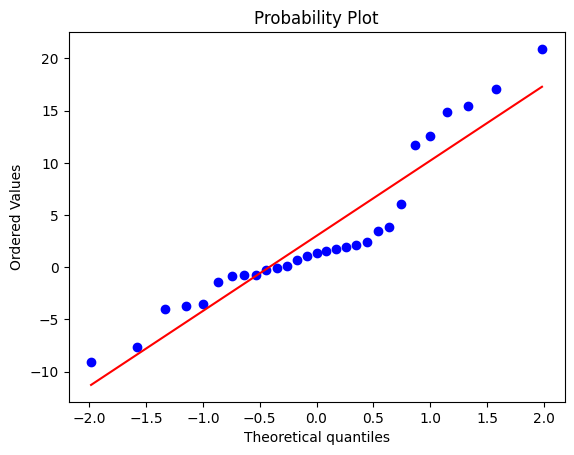

In [20]:
_ = st.probplot(w[:,1]-w[:,0], plot=plt)


###  # Shapiro (``st.chapiro''') 

In [21]:
st.shapiro(w[:,1]-w[:,0])


ShapiroResult(statistic=0.8961783647537231, pvalue=0.007945157587528229)

###  # Sign criterion ( ``sign_test'' &apos; ) 

In [22]:
sign_test(w[:,1]-w[:,0])


(3.5, 0.26493089646101)

###  # Wilcoxon (``st.wilcoxon'') 

In [23]:
st.wilcoxon(w[:,1]-w[:,0])


WilcoxonResult(statistic=131.5, pvalue=0.06551516801118851)

###  # The permutation criterion (``one_sample'''): 

In [24]:
one_sample(w[:,1]-w[:,0],  alternative='two-sided')


(0.03465965340346597, 3.006896551724138)

###  #Confidence interval for average weight increase with bootstrap: 

In [25]:
bs = IIDBootstrap(w[:,1]- w[:,0])
print(bs.conf_int(np.mean, 1000, method='bca'))


[[0.82301799]
 [6.17380953]]


###  # Confidence interval for the mid-point of weight increase: 

In [26]:
bs = IIDBootstrap(w[:,1]- w[:,0])
print(bs.conf_int(np.median, 1000, method='bca'))


[[-0.7]
 [ 2.1]]


  ## Real estate in Seattle 
**Hesterberg T., Monaghan S., Moore D.S., Clipson A., Epstein R. (2005). Bootstrap methods and permutation tests. In Introduction to the Practice of Statistics, New York: W. H. Freeman and Company. ** http://statweb.stanford.edu/~tibs/stat315a/Supplements/bootstrap.pdf

  Data on the sales value of real estate in Seattle are available for 50 transactions in 2001 and 50 in 2002.    Have prices changed? 

###  # Data 

In [27]:
data = pd.read_csv('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/seminars/sem3/data/seattle.txt', delimiter='\t')
data.head()


,Price,Year
0,142.0,2002
1,232.0,2002
2,132.5,2002
3,200.0,2002
4,362.0,2002


#### Boxplot

<AxesSubplot: xlabel='Year', ylabel='Price'>

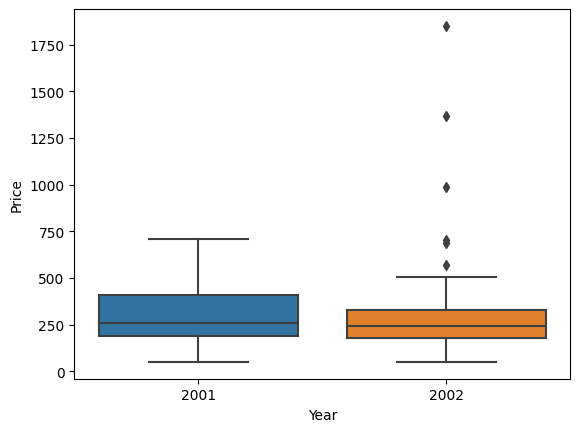

In [28]:
sns.boxplot(data=data, y="Price", x="Year")


In [29]:
x1 = data.loc[data['Year']==2001]['Price'].values
x2 = data.loc[data['Year']==2002]['Price'].values


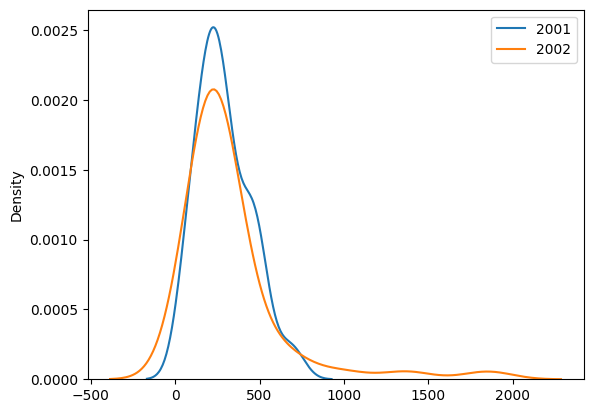

In [30]:
sns.kdeplot(x1, label='2001')
sns.kdeplot(x2, label='2002')
plt.legend(loc="best")
plt.show()


###  # QQ chart 

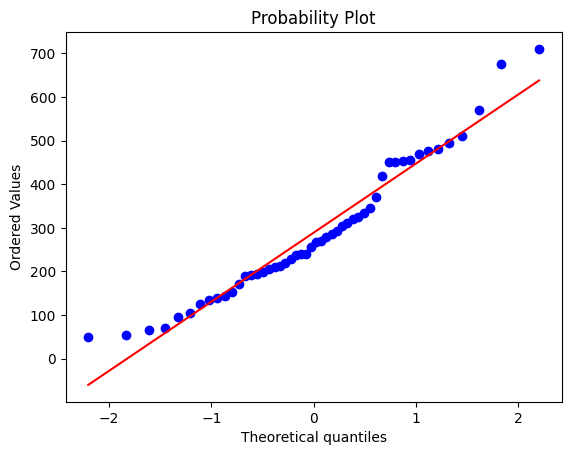

In [31]:
_ = st.probplot(x1, plot=plt)


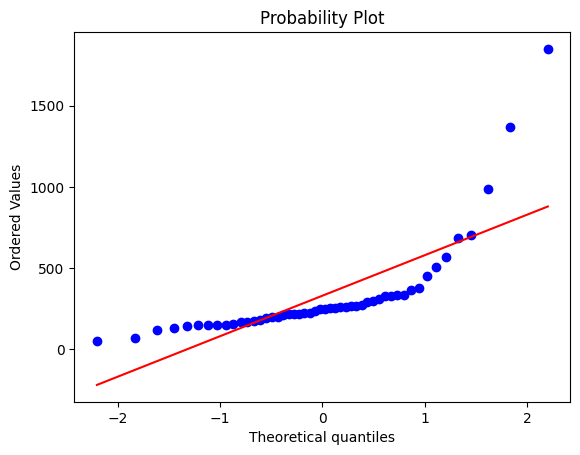

In [32]:
_ = st.probplot(x2, plot=plt)


###  # Student's criterion: 

In [33]:
st.ttest_ind(x1, x2)


Ttest_indResult(statistic=-0.8057258725189664, pvalue=0.42235167114691463)

###  # Mann-Whitney Wilcoxon criterion: 

In [34]:
st.mannwhitneyu(x1, x2, alternative= 'two-sided')


MannwhitneyuResult(statistic=1295.5, pvalue=0.7563872675701748)

###  # The permutation criterion: 

In [35]:
two_sample(x1, x2,  alternative='two-sided')


(0.43925560744392556, -40.33059999999995)

  #### Confidence intervals for averages in samples using bootstrap: 
  Expected replies ```[246, 330], [241.403] ```' 

In [36]:
bs = IIDBootstrap(x1)
print(bs.conf_int(np.mean, 1000, method='bca'))

bs = IIDBootstrap(x2)
print(bs.conf_int(np.mean, 1000, method='bca'))


[[248.56919259]
 [335.25038167]]
[[259.53454719]
 [441.87861534]]


  #### The confidence interval for the difference between the two averages with the bootstrap: 
  Expected replies: ```[-52, 115] ``'' 

In [ ]:
bs = IIDBootstrap(x2-x1)
print(bs.conf_int(np.mean, 1000, method='bca'))


###  # Kolmogorov-Smirnov statistics 

In [37]:
st.ks_2samp(x1, x2)


KstestResult(statistic=0.14, pvalue=0.7166468440414822)

  # Aluminium in the poplars 
  
**Laureysens I., Blust R., De Temmerman L., Lemmens C., Ceulemans R. (2004). Clonal variation in heavy metal accumulation and biomass production in a poplar coppice culture. I. Seasonal variation in leaf, wood and bark concentrations. Environmental Pollution, 131, 485-494. **

  For 13 varieties of poplars growing in the zone of intense pollution, in 
  The mean concentration of aluminium in micrograms was measured on August and November 
  gram of wood. 

In [38]:
al = pd.read_csv('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/seminars/sem3/data/poplar.txt', delimiter='\t')
al.head()


,Clone,August,November
0,Columbia River,18.3,12.7
1,Fritzi Pauley,13.3,11.1
2,Hazendans,16.5,15.3
3,Primo,12.6,12.7
4,Raspalje,9.5,10.5


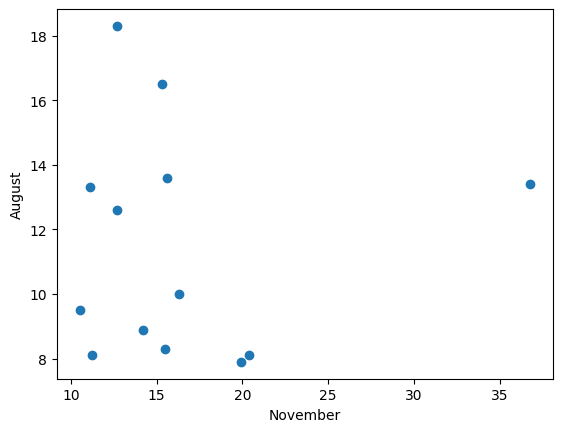

In [39]:
plt.scatter(al['November'].values, al['August'].values)
plt.xlabel('November')
plt.ylabel('August')
plt.show()


In [40]:
delta = al['August']-al['November']


###  # QQ Graph 

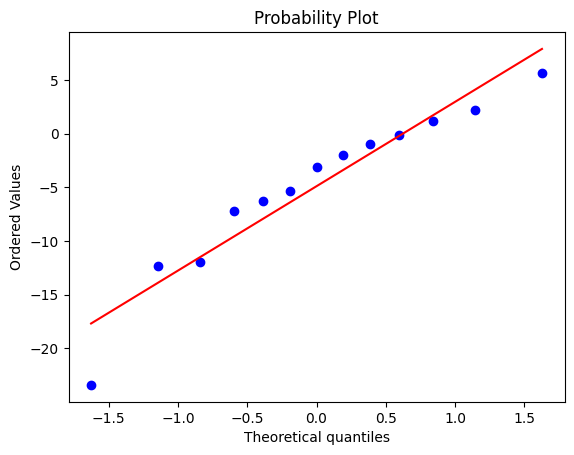

In [41]:
_ = st.probplot(delta, plot=plt)


###  # Signal criterion 

In [42]:
sign_test(delta)


(-3.5, 0.09228515625)

###  # The Wilcoxon Criterion 

In [43]:
st.wilcoxon(delta)


WilcoxonResult(statistic=16.0, pvalue=0.039794921875)

###  # The permutation criterion 

In [44]:
one_sample(al['November']-al['August'],  alternative='two-sided')


(0.02977970220297797, 4.8999999999999995)

  #### Change statistics (instead of ``mean'' to ``t'') 
  Expected response: ``'0.03''' 

In [ ]:
#  Your code. 


###  # Confidence interval for average difference with buttrep 

In [45]:
bs = IIDBootstrap(delta)
bs.conf_int(np.mean, 1000, method='basic')


array([[-8.47826923],
       [-0.54538462]])

###  # The confidence interval is 'bca' 

In [ ]:
bs = IIDBootstrap(delta)
bs.conf_int(np.mean, 1000, method='bca')


###  # Reliance of the confidence interval to the number of attempts to semplicate (check for n 

In [ ]:
for id, i in enumerate([5,10,50,100,500,1000, 5000, 10000]):
    bs = IIDBootstrap(delta)
    ci = bs.conf_int(np.mean, i, method='basic')
    plt.plot([np.log(i), np.log(i)], ci )


In [ ]:
for id, i in enumerate([5,10,50,100,500,1000, 5000, 10000, 20000]):
    bs = IIDBootstrap(delta)
    ci = bs.conf_int(np.mean, i, method='bca')
    plt.plot([np.log(i), np.log(i)], ci)
    print(ci)


###  # Dependence of the confidence interval on the level of trust 

In [ ]:
for p in [0.1, 0.2, 0.3,0.5, 0.7, 0.8, 0.9, 0.95, 0.99]:
    bs = IIDBootstrap(delta)
    ci = bs.conf_int(np.mean, 5000,size=p, method='bca')
    plt.plot([p, p], ci )
    print (ci)


##   Telecommunication repair time 

Verizon is the primary local telephone company (the legal term is Incumbent Local Exchange Carrier, ILEC) for a large area in the eastern United States. As such, it is responsible for providing repair service for the customers of other telephone companies (known as Competing Local Exchange Carriers, CLECs) in this region. Verizon is subject to fines if the repair times (the time it takes to fix a problem) for CLEC customers are substantially worse than those for Verizon’s own customers. This is determined using hypothesis tests, negotiated with the local Public Utilities Commission (PUC).

###  # Data 

In [46]:
data = pd.read_csv('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/seminars/sem3/data/verizon.txt', delimiter='\t')
data.head()


,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


#### Boxplot

<AxesSubplot: xlabel='Time', ylabel='Group'>

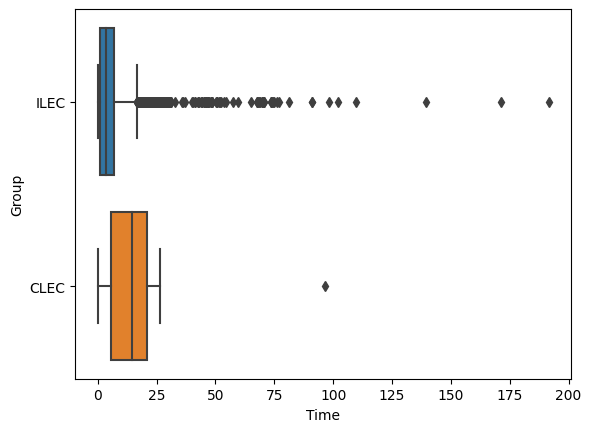

In [47]:
sns.boxplot(data=data,x='Time', y='Group')


In [48]:
x1 = data.loc[data['Group']=='ILEC']['Time'].values
x2 = data.loc[data['Group']=='CLEC']['Time'].values
x1.shape, x2.shape


((1664,), (23,))

###  # Histogram 

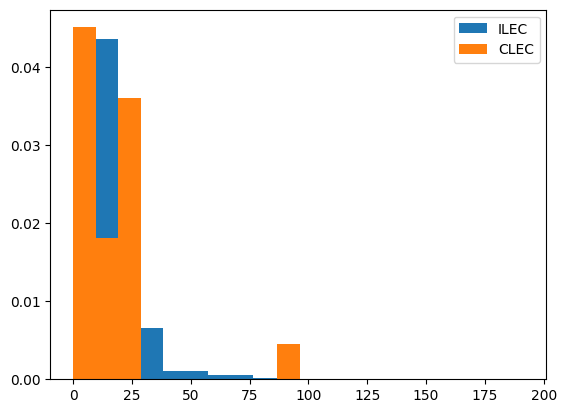

In [49]:
plt.hist(x1, bins=10, density=True, label="ILEC")
plt.hist(x2, bins=10, density=True, label='CLEC')
plt.legend(loc="best")
plt.show()


#### QQ-plot

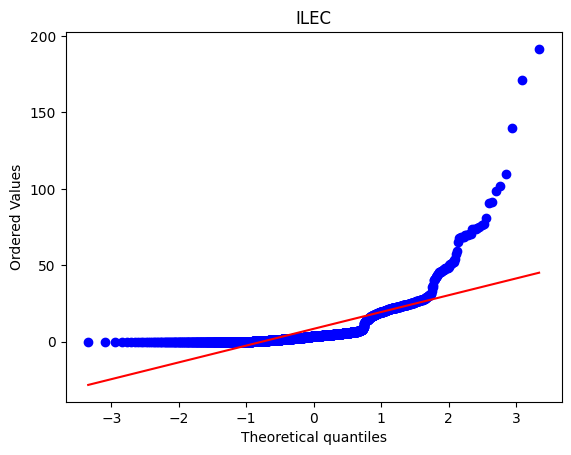

In [50]:
st.probplot(x1, plot=plt)
plt.title('ILEC')
plt.show()


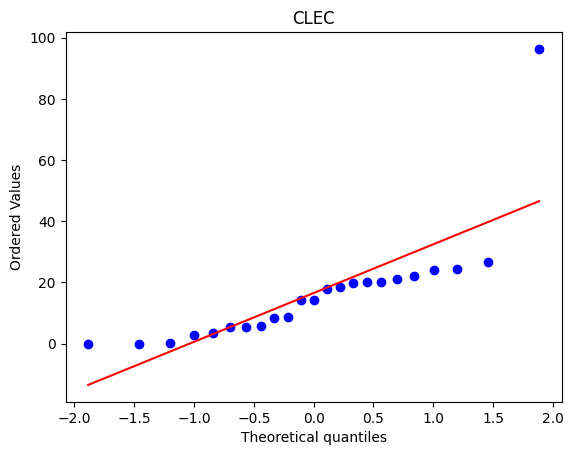

In [51]:
st.probplot(x2, plot=plt)
plt.title('CLEC')
plt.show()


###  # Mana Whitney Wilcockson Criterion 

In [52]:
st.mannwhitneyu(x1, x2, alternative='two-sided')


MannwhitneyuResult(statistic=11452.0, pvalue=0.0009130276886676177)

###  # The permutation criterion 

In [53]:
two_sample(x1, x2, reps=1000, alternative='two-sided')


(0.03796203796203797, -8.097519857859533)

###  # Kolmogorov-Smirnov criterion

In [54]:
st.ks_2samp(x1,x2)


KstestResult(statistic=0.45147888795986624, pvalue=9.726002165028644e-05)